In [1]:
import methods
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
file_name = '/global/cfs/cdirs/m3246/vmikuni/QNF/piplus.hdf5'
e,layer_energies = methods.DataLoaderCaloGAN(file_name)

(array([ 9888.,  9844.,  9901., 10177., 10177., 10035.,  9978.,  9949.,
        10132.,  9919.]),
 array([0.01000172, 0.10900088, 0.20800003, 0.30699918, 0.40599835,
        0.50499749, 0.60399663, 0.70299578, 0.80199498, 0.90099412,
        0.99999326]),
 <BarContainer object of 10 artists>)

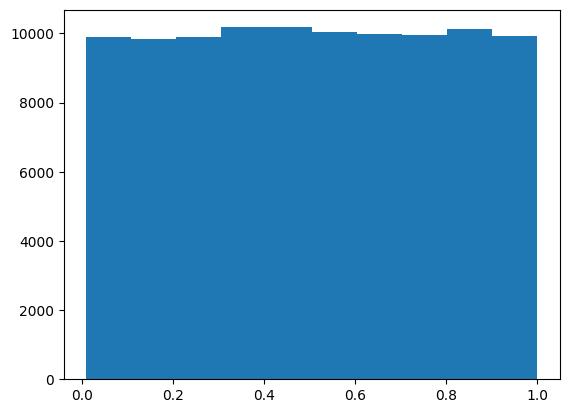

In [3]:
plt.hist(e,bins=10)

In [4]:
model,dist = methods.MADE(e.shape[1],layer_energies.shape[1])

In [ ]:
batch_size = 128
myhistory = model.fit([e,layer_energies],
                    y=np.ones((len(e),0), dtype=np.float32), #dummy labels                                                                                                                                   
                    batch_size=batch_size,
                    epochs=200,
                    verbose = 1)

Epoch 1/200
782/782 [==============================] - 11s 8ms/step - loss: 0.1256
Epoch 2/200
782/782 [==============================] - 6s 8ms/step - loss: -0.0101
Epoch 3/200
782/782 [==============================] - 6s 8ms/step - loss: -0.1088
Epoch 4/200
782/782 [==============================] - 6s 8ms/step - loss: -0.1889
Epoch 5/200
782/782 [==============================] - 6s 8ms/step - loss: -0.2378
Epoch 6/200
782/782 [==============================] - 6s 8ms/step - loss: -0.2683
Epoch 7/200
782/782 [==============================] - 6s 8ms/step - loss: -0.2919
Epoch 8/200
782/782 [==============================] - 6s 8ms/step - loss: -0.3060
Epoch 9/200
782/782 [==============================] - 6s 8ms/step - loss: -0.3238
Epoch 10/200
782/782 [==============================] - 6s 8ms/step - loss: -0.3233
Epoch 11/200
782/782 [==============================] - 6s 8ms/step - loss: -0.3344
Epoch 12/200
782/782 [==============================] - 6s 8ms/step - loss: -0.3361
E

In [ ]:
bijector_kwargs = methods.make_bijector_kwargs(
                dist.bijector, {'made.': {'conditional_input': layer_energies}})
output = dist.sample(layer_energies.shape[0], bijector_kwargs=bijector_kwargs).numpy()    

In [ ]:
plt.hist(output,bins=10,range=(0,1))

In [ ]:
gaussian = dist.bijector.inverse(e,**bijector_kwargs).numpy()

In [ ]:
uniform = norm.cdf(gaussian)

In [ ]:
plt.hist(uniform,bins=10)